In [1]:
import earthkit

In [2]:
data = earthkit.data.from_source(
    "cds",
    'sis-agrometeorological-indicators',
    {
        'variable': '2m_relative_humidity',
        'year': '2023',
        'month': '01',
        'day': '01',
        'time': '12_00',
    },
)

In [3]:
style = earthkit.maps.styles.Contour(
    colors="cividis_r",
    levels=range(0, 101, 5),
)

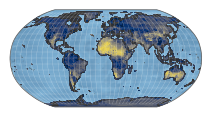

In [4]:
import cartopy.crs as ccrs

earthkit.maps.schema.figsize = (2, 2)
chart = earthkit.maps.Superplot(crs=ccrs.Robinson())

chart.plot(data, style=style)

chart.stock_img()

chart.coastlines(resolution="medium")
chart.gridlines(
    draw_labels=False,
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 90, 10),
    ylim=80,
    linestyle="-",
    alpha=0.5,
    color="white",
    linewidth=0.2,
)

chart.show()